## Wrangling and Analysis

### What type of products are sold by the top 20 companies?

In [589]:
companies

['Walmart',
 'ExxonMobil',
 'Berkshire Hathaway',
 'Apple Inc.',
 'UnitedHealth Group',
 'McKesson Corporation',
 'CVS Health',
 'Amazon (company)',
 'AT&T',
 'General Motors',
 'Ford Motor Company',
 'AmerisourceBergen',
 'Chevron Corporation',
 'Cardinal Health',
 'Costco',
 'Verizon Communications',
 'Kroger',
 'General Electric',
 'Walgreens Boots Alliance',
 'JPMorgan Chase']

In [590]:
regex1 = re.compile('[\{\[]+(.*?)[\]\}]')
regex2 = re.compile('[^a-zA-Z\- ]')
products = []
data = []
for x in wiki_data:
    y = x['products'] # get products
    z = regex1.findall(y) # extract all products
    z = [d.lower().split('|') for d in z] # get a list 
    m = list(itertools.chain(*z)) # flatten the list
    m = [regex2.sub('', t) for t in m  if t != 'hlist'] # remove hlist (a rogue token)
    data.append({'wiki_title' : x['company_name'], 'product' : '|'.join(m)})
    products.extend(m)

In [591]:
print(products)

['electronics', 'movies and music', 'home and furniture', 'home improvement', 'clothing', 'footwear', 'jewelry', 'toys', 'health and beauty', 'pet supplies', 'sporting goods and fitness', 'auto', 'photo finishing', 'craft supplies', 'party supplies', 'grocery', 'crude oil', 'oil products', 'natural gas', 'petrochemical', 'power generation', 'investment', 'diversified investments', 'insurancetypes', 'property  casualty insurance', 'public utility', 'utilities', 'restaurants', 'food processing', 'aerospace', 'toys', 'mass media', 'media', 'automotive industry', 'automotive', 'sports equipment', 'sporting goods', 'final good', 'consumer products', 'internet', 'real estate', 'macintosh', 'ipod', 'iphone', 'ipad', 'apple watch', 'apple tv', 'homepod', 'macos', 'ios', 'ipados', 'watchos', 'tvos', 'ilife', 'iwork', 'final cut pro', 'logic pro', 'garageband', 'shazam application', 'shazam', 'siri', 'uniprise', 'health care', 'service economics', 'services', 'ingenix', 'pharmaceuticals', 'medic

To create wordclouds,

In [592]:
def create_wordcloud(items, stopwords=[]):
    # Create the wordcloud object
    text = ' '.join(items)
    wordcloud = WordCloud(width=1000, height=800, margin=0, 
                          stopwords=stopwords).generate(text) #  max_words=20 

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()

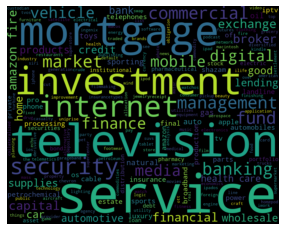

In [593]:
create_wordcloud(products, ['and'])

### What type of industries do the top 20 company belong from?

In [594]:
regex = re.compile('[\[]+(.*?)[\]]')
industries = []
for i, x in enumerate(wiki_data):
    y = x['industry'] # get industries
    z = regex.findall(y) # extract industries
    z = [d.lower().split('|') for d in z] # get a list
    m = list(itertools.chain(*z)) # flatten
    data[i]['industry'] = '|'.join(m)
    industries.extend(m)

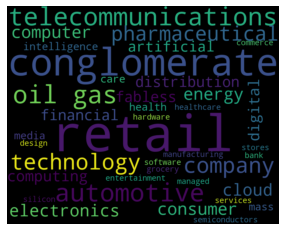

In [607]:
create_wordcloud(industries, ['industry', 'and'])

### What the assets of the top 20 companies look like?

In [596]:
regex = re.compile('([\d\.]+)(?!billion|million|trillion)')
assets = []
for i, x in enumerate(wiki_data):
    y = x['assets'] # get assets
    z = regex.findall(y) # extract assets
    u = re.findall('(billion|million|trillion)', y) # extract the unit
    asset = float(z[0]) # get the numeric value
    unit = u[0]
    data[i]['assets'] = str(asset) + ' ' + unit
    assets.append({x['company_name'] : (asset, unit)})

In [597]:
assets

[{'Walmart': (219.295, 'billion')},
 {'ExxonMobil': (346.2, 'billion')},
 {'Berkshire Hathaway': (707.8, 'billion')},
 {'Apple Inc.': (338.516, 'billion')},
 {'UnitedHealth Group': (173.889, 'billion')},
 {'McKesson Corporation': (60.381, 'billion')},
 {'CVS Health': (196.456, 'billion')},
 {'Amazon (company)': (162.648, 'billion')},
 {'AT&T': (531.0, 'billion')},
 {'General Motors': (227.339, 'billion')},
 {'Ford Motor Company': (256.54, 'billion')},
 {'AmerisourceBergen': (37.66, 'billion')},
 {'Chevron Corporation': (253.9, 'billion')},
 {'Cardinal Health': (39.95, 'billion')},
 {'Costco': (45.4, 'billion')},
 {'Verizon Communications': (264.82, 'billion')},
 {'Kroger': (38.11, 'billion')},
 {'General Electric': (309.129, 'billion')},
 {'Walgreens Boots Alliance': (67.59, 'billion')},
 {'JPMorgan Chase': (2.687, 'trillion')}]

Normalize all the values/units,

In [598]:
for i, asset in enumerate(assets):
    for k, v in asset.items():
        if v[1] == 'trillion':
            assets[i][k] = (v[0]*1000, 'billion')

In [599]:
assets

[{'Walmart': (219.295, 'billion')},
 {'ExxonMobil': (346.2, 'billion')},
 {'Berkshire Hathaway': (707.8, 'billion')},
 {'Apple Inc.': (338.516, 'billion')},
 {'UnitedHealth Group': (173.889, 'billion')},
 {'McKesson Corporation': (60.381, 'billion')},
 {'CVS Health': (196.456, 'billion')},
 {'Amazon (company)': (162.648, 'billion')},
 {'AT&T': (531.0, 'billion')},
 {'General Motors': (227.339, 'billion')},
 {'Ford Motor Company': (256.54, 'billion')},
 {'AmerisourceBergen': (37.66, 'billion')},
 {'Chevron Corporation': (253.9, 'billion')},
 {'Cardinal Health': (39.95, 'billion')},
 {'Costco': (45.4, 'billion')},
 {'Verizon Communications': (264.82, 'billion')},
 {'Kroger': (38.11, 'billion')},
 {'General Electric': (309.129, 'billion')},
 {'Walgreens Boots Alliance': (67.59, 'billion')},
 {'JPMorgan Chase': (2687.0, 'billion')}]

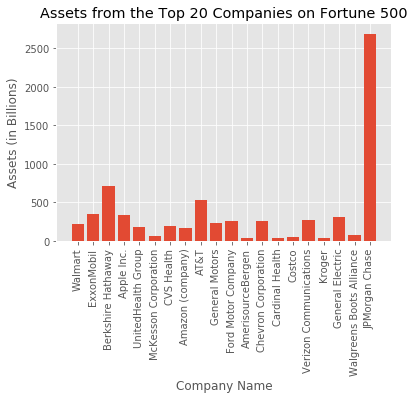

In [602]:
x = [list(a.keys())[0] for a in assets]
energy = [list(a.values())[0][0] for a in assets]
x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy)
plt.ylabel("Assets (in Billions)")
plt.xlabel("Company Name")
plt.title("Assets from the Top 20 Companies on Fortune 500")
plt.xticks(x_pos, x, rotation=90)
plt.show()

In [603]:
data

[{'wiki_title': 'Walmart',
  'product': 'electronics|movies and music|home and furniture|home improvement|clothing|footwear|jewelry|toys|health and beauty|pet supplies|sporting goods and fitness|auto|photo finishing|craft supplies|party supplies|grocery',
  'industry': 'retail',
  'assets': '219.295 billion'},
 {'wiki_title': 'ExxonMobil',
  'product': 'crude oil|oil products|natural gas|petrochemical|power generation',
  'industry': 'energy industry|energy|oil and gas industry|oil and gas',
  'assets': '346.2 billion'},
 {'wiki_title': 'Berkshire Hathaway',
  'product': 'investment|diversified investments|insurancetypes|property  casualty insurance|public utility|utilities|restaurants|food processing|aerospace|toys|mass media|media|automotive industry|automotive|sports equipment|sporting goods|final good|consumer products|internet|real estate',
  'industry': 'conglomerate (company)|conglomerate',
  'assets': '707.8 billion'},
 {'wiki_title': 'Apple Inc.',
  'product': 'macintosh|ipod|

In [604]:
df_new = pd.DataFrame(data)
df_new.head()

,wiki_title,product,industry,assets
0,Walmart,electronics|movies and music|home and furnitur...,retail,219.295 billion
1,ExxonMobil,crude oil|oil products|natural gas|petrochemic...,energy industry|energy|oil and gas industry|oi...,346.2 billion
2,Berkshire Hathaway,investment|diversified investments|insurancety...,conglomerate (company)|conglomerate,707.8 billion
3,Apple Inc.,macintosh|ipod|iphone|ipad|apple watch|apple t...,computer hardware|computer software|consumer e...,338.516 billion
4,UnitedHealth Group,uniprise|health care|service economics|service...,managed health care,173.889 billion


In [605]:
df = pd.concat([df_sub, df_new], axis=1)

In [606]:
df.to_csv('./data/top_20_companies.csv', index=False)